### Prelude

In [1]:
import numpy as np

from sympy import *
import scipy.integrate as integrate
import math

import matplotlib.pyplot as plt
%matplotlib inline

def gaussian(x,mu,sigma):
    return (1/(sigma * sqrt(2*pi)) * exp(-(mu-x)**2 / (2*sigma**2)))

### Input

In [2]:
hours_estimated = 6
plus_minus = 3

### Computation

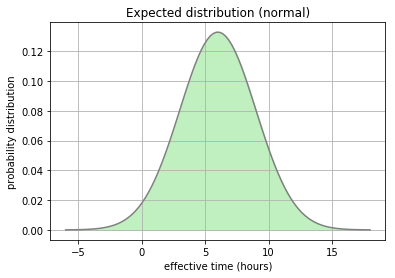

In [3]:
x = np.linspace(hours_estimated - 4*plus_minus, hours_estimated + 4*plus_minus,100)
y = np.array([gaussian(v,hours_estimated, plus_minus) for v in x],dtype='float')
plt.grid(True)
plt.title('Expected distribution (normal)')
plt.xlabel('effective time (hours)')
plt.ylabel('probability distribution')
plt.plot(x,y,color='gray')
plt.fill_between(x,y,0,color='#c0f0c0')
plt.show()

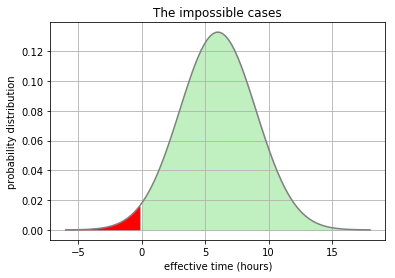

In [4]:
x = np.linspace(hours_estimated - 4*plus_minus, hours_estimated + 4*plus_minus,100)
y = np.array([gaussian(v,hours_estimated, plus_minus) for v in x],dtype='float')
plt.grid(True)
plt.title('The impossible cases')
plt.xlabel('effective time (hours)')
plt.ylabel('probability distribution')
plt.plot(x,y,color='gray')
plt.fill_between(x,y,where=x>0,color='#c0f0c0')
plt.fill_between(x,y,where=x<=0, color='#ff0000')
plt.show()

### summing up the error

In [5]:
red_surface = integrate.quad(lambda x: gaussian(x, hours_estimated, plus_minus), -(math.inf), 0)
red_surface[0]

0.022750131948179212

In [6]:
corrected_mean = 0
for x_val in x:
    integral_so_far = integrate.quad(lambda x: gaussian(x, hours_estimated, plus_minus), hours_estimated, x_val)
    if(integral_so_far[0] > red_surface[0]):
        corrected_mean = x_val
        break
        
def belowzero(x):
    if (x<=0):
        return true
    else:
        return false
    
def zerotomean(x):
    if (x>0 and x<= hours_estimated):
        return true
    else:
        return false
    
def meantocorrectedmean(x):
    if (x>hours_estimated and x<= corrected_mean):
        return true
    else:
        return false

def abovecorrected(x):
    if (x>corrected_mean):
        return true
    else:
        return false

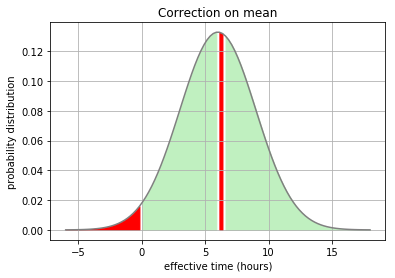

In [7]:


x = np.linspace(hours_estimated - 4*plus_minus, hours_estimated + 4*plus_minus,100)
y = np.array([gaussian(v,hours_estimated, plus_minus) for v in x],dtype='float')
plt.grid(True)
plt.title('Correction on mean')
plt.xlabel('effective time (hours)')
plt.ylabel('probability distribution')
plt.plot(x,y,color='gray')
plt.fill_between(x,y,where=(x<=0), color='#ff0000')
plt.fill_between(x,y,where=((x>0) & (x<=hours_estimated)), color='#c0f0c0')
plt.fill_between(x,y,where=((x>hours_estimated) & (x<=corrected_mean)), color='#ff0000')
plt.fill_between(x,y,where=(x>corrected_mean), color='#c0f0c0')
plt.show()

### Error (%) 

In [8]:
err = (corrected_mean - hours_estimated) / hours_estimated * 100
print("A task estimated at %.2f hours (+/- %.2f hours) is likely to turn out %.2f percent above estimation" % (hours_estimated, plus_minus, err))

A task estimated at 6.00 hours (+/- 3.00 hours) is likely to turn out 6.06 percent above estimation
